In [1]:
from sklearn.datasets import load_wine 

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
wines = load_wine()

In [5]:
type(wines)

sklearn.utils.Bunch

In [6]:
X = wines.data

In [7]:
y = wines.target

In [8]:
wines.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [9]:
wines.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [11]:
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn import tree
clf = DT()
clf.fit(X_train,y_train)


DecisionTreeClassifier()

In [12]:
clf.predict(X_test)

array([0, 2, 1, 0, 1, 1, 0, 2, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 0, 0, 0])

In [13]:
clf.score(X_test,y_test)

0.9722222222222222

In [14]:
import graphviz

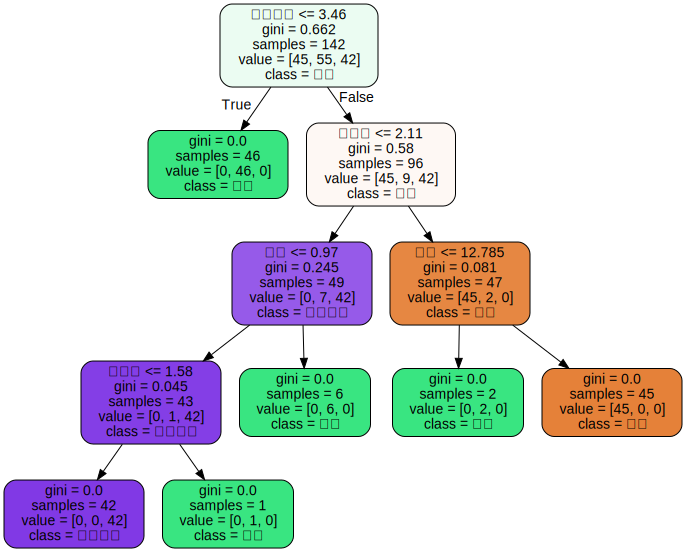

In [16]:
dot_data = tree.export_graphviz(clf
                                ,feature_names=['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类','花青素','颜色强度','色调','od280/od315稀释葡萄酒','脯氨酸']
                                ,class_names=['琴酒','雪莉','贝尔摩德']
                                ,filled=True
                                ,rounded=True)
graphviz.Source(dot_data)

In [34]:
feature_name
zip_res = zip(feature_name,clf.feature_importances_)

In [35]:
[*zip(zip_res)]

[(('alcohol', 0.040736313650490096),),
 (('malic_acid', 0.0),),
 (('ash', 0.0),),
 (('alcalinity_of_ash', 0.0),),
 (('magnesium', 0.0),),
 (('total_phenols', 0.0),),
 (('flavanoids', 0.4447333754009863),),
 (('nonflavanoid_phenols', 0.0),),
 (('proanthocyanins', 0.0),),
 (('color_intensity', 0.40766853932584274),),
 (('hue', 0.10686177162268096),),
 (('od280/od315_of_diluted_wines', 0.0),),
 (('proline', 0.0),)]

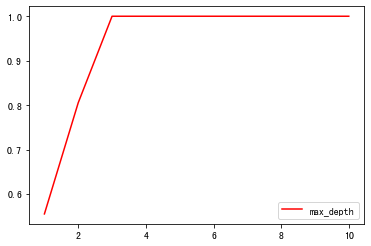

In [36]:
# 对深度参数进行学习
import matplotlib.pyplot as plt
test = []
for i in range(10):
    clf = tree.DecisionTreeClassifier(max_depth=i+1
                                    ,criterion="entropy"
                                    ,random_state=30
                                    ,splitter="random"
                                    )
    clf = clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    test.append(score)
plt.plot(range(1,11),test,color="red",label="max_depth")
plt.legend()
plt.show()

In [39]:
#apply返回每个测试样本所在的叶子节点的索引
clf.apply(X_test)

array([24,  7, 15, 24, 19, 15, 24,  5, 15, 12, 13,  5, 24, 15,  7, 15, 24,
       24,  9, 24, 19, 24, 22, 15,  9, 15, 15, 12, 15,  7, 24, 22, 15, 24,
       24, 22])